# Breast Cancer Classification
The breast cancer dataset is a classic and very easy binary classification dataset.   
Classifications - malignant and benign

# Imports

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
dataset = pd.concat([X, y], axis=1)

data_info = load_breast_cancer()
print(data_info.keys())

feature_names = data_info.feature_names
target_names = data_info.target_names

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


# Info about Data

In [3]:
from Clean_Data import CleanData
cd = CleanData(X, y)
cd.get_info()
# the outliers values need not to displayed
# Target value count should be displayed with percentages

----class run complete----
-------------------------------------------------------------
                    Data Info:
-------------------------------------------------------------
No. of samples: 	 569
No. of features: 	 30
Feature Names: 		 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Targets: 		 [0 1]
Target Value Count: 	 {1: 357, 0: 212}
Total Missing values: 	 0
Outliers Detected: 	 (608, [25.22, 22.27, 24.25, 23.27, 27.22, 23.29])
Duplicates: 		 0
Whether s

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

We can observe:
- No null values
- 569 instances and 30 features
- All features are float type
- 2 classes: malignant and benign:
    - 0 - malignant
    - 1 - benign


# Value Counts

In [5]:
def val_counts(y, include_index=False):
    val_counts = y.value_counts()
    percentage_ = (val_counts/len(y) * 100).round(3) 
    val_counts = pd.concat([val_counts, percentage_], axis=1)
    val_counts.columns = ['Counts', 'Percentage']
    if include_index:
        val_counts.index = ['Benign', 'Malignant']
    return val_counts

val_count_y = val_counts(y)
print(val_count_y)

        Counts  Percentage
target                    
1          357      62.742
0          212      37.258


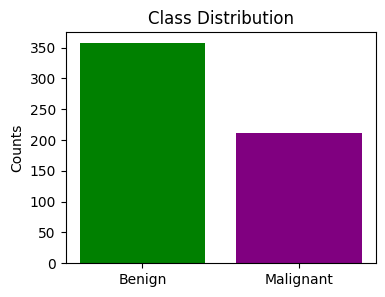

In [6]:
# plot bar chart
plt.figure(figsize=(4,3))
plt.bar( x = ['Benign', 'Malignant'], height = val_count_y['Counts'], color = ['green','purple'])
plt.title('Class Distribution')
plt.ylabel('Counts')
plt.show()

We see that the dataset is imbalanced having less malignant cases than benign cases.      
Thus, we need to split the data in a stratified manner.

# Split Data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, stratify = y, shuffle = True, random_state=42)
# We use 'stratify' parameter : array-like, default=None
# If not None, data is split in a stratified fashion, using this as the class labels.

# check the distribution of classes in train and test set
print("Train: \n", val_counts(y_train, include_index=True))
print("\nTest: \n", val_counts(y_test, include_index=True))

Train: 
            Counts  Percentage
Benign        239       62.73
Malignant     142       37.27

Test: 
            Counts  Percentage
Benign        118      62.766
Malignant      70      37.234


- Both the train and test data are stratified.   
- I.e. they have the same proportion of malignant and benign cases.    
- Stratified sampling is used to select a representative and unbiased sample from the dataset, ensuring that each class is proportionally represented in both the training and testing subsets. 

# EDA
Exploratory Data Analysis:

**Feature Analysis using plots:**
1. *Univariate Analysis:* Analyze each feature individually to understand its distribution, central tendency, and spread. Common plots used for univariate analysis include **histograms, box plots, and density plots**.

2. *Bivariate Analysis:* Examine the relationship between each feature and the target variable. This can be done using **scatter plots** (for continuous variables) or **bar plots** (for categorical variables) to observe how the target variable changes concerning the feature.

3. *Correlation Analysis or Multivariate Analysis:* Create a correlation matrix or **heatmap** to visualize the relationships between features and the target variable, as well as between features themselves.


## Histograms
Univariate Analysis

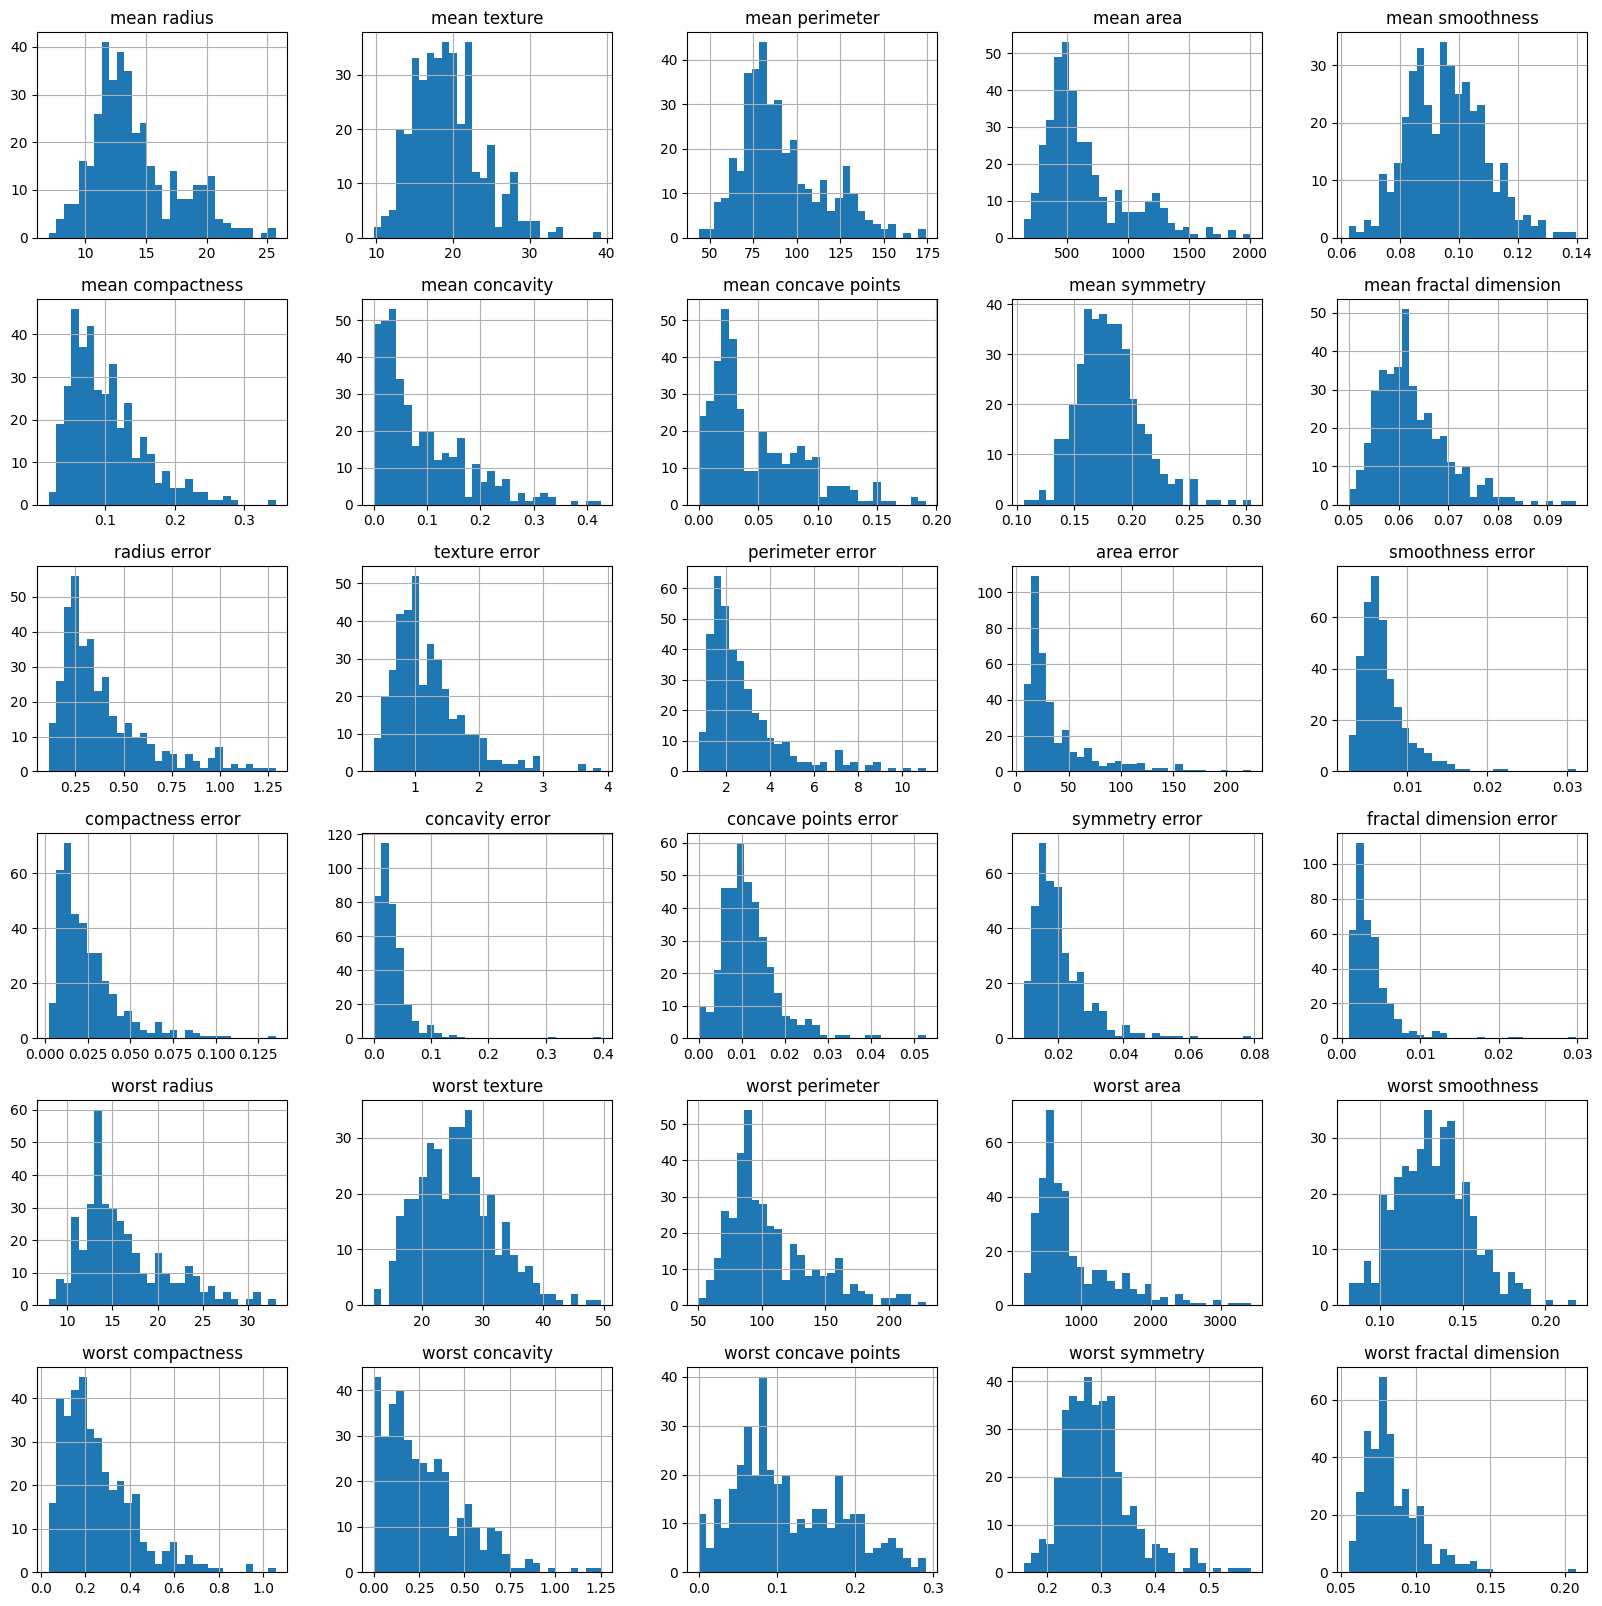

In [8]:
X_train.hist(bins=30, figsize=(20,20))
plt.show()

- Features 'mean smoothness' and 'mean symmetry' are normally distributed.
- Almost all other features are right skewed.(mean > median)
- Features are on different scales. We need to scale them.

## Box Plot
Univariate Analysis

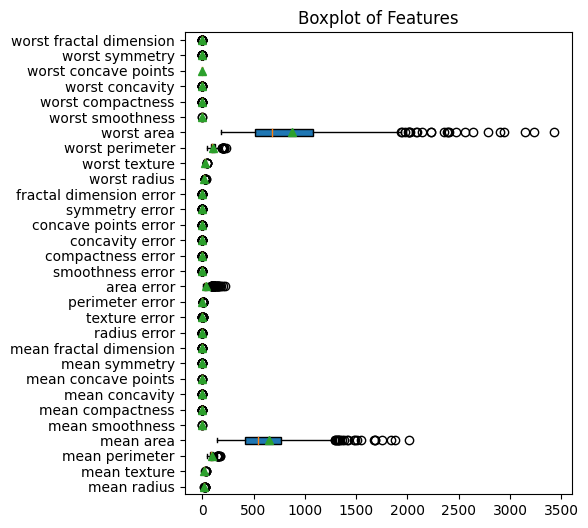

In [9]:
plt.figure(figsize=(5,6))
plt.boxplot(X_train, vert=False, showmeans=True ,patch_artist = True, labels=feature_names)
plt.title('Boxplot of Features')
plt.show()

It can be infered that:
- Features 'mean area', 'area error', wrost area' have the most outliers.
- They also have vast scales and right skewed distribution.
- Other features have mostly the same scale with few outliers.

## Scatter plots
Bivariate Analysis

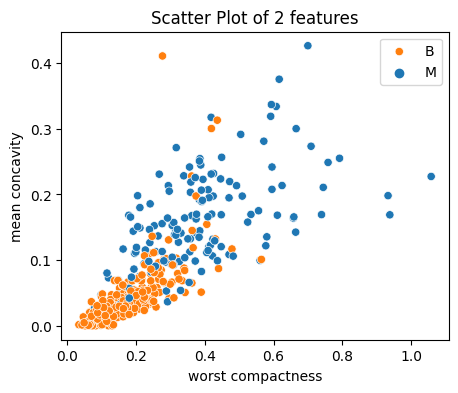

In [10]:
plt.figure(figsize=(5,4))
sns.scatterplot(x = X_train['worst compactness'], y = X_train['mean concavity'], hue = y_train, )
plt.legend(['B','M'])
plt.title("Scatter Plot of 2 features")
plt.show()

## Correlation Matrix
Multivariate Analysis

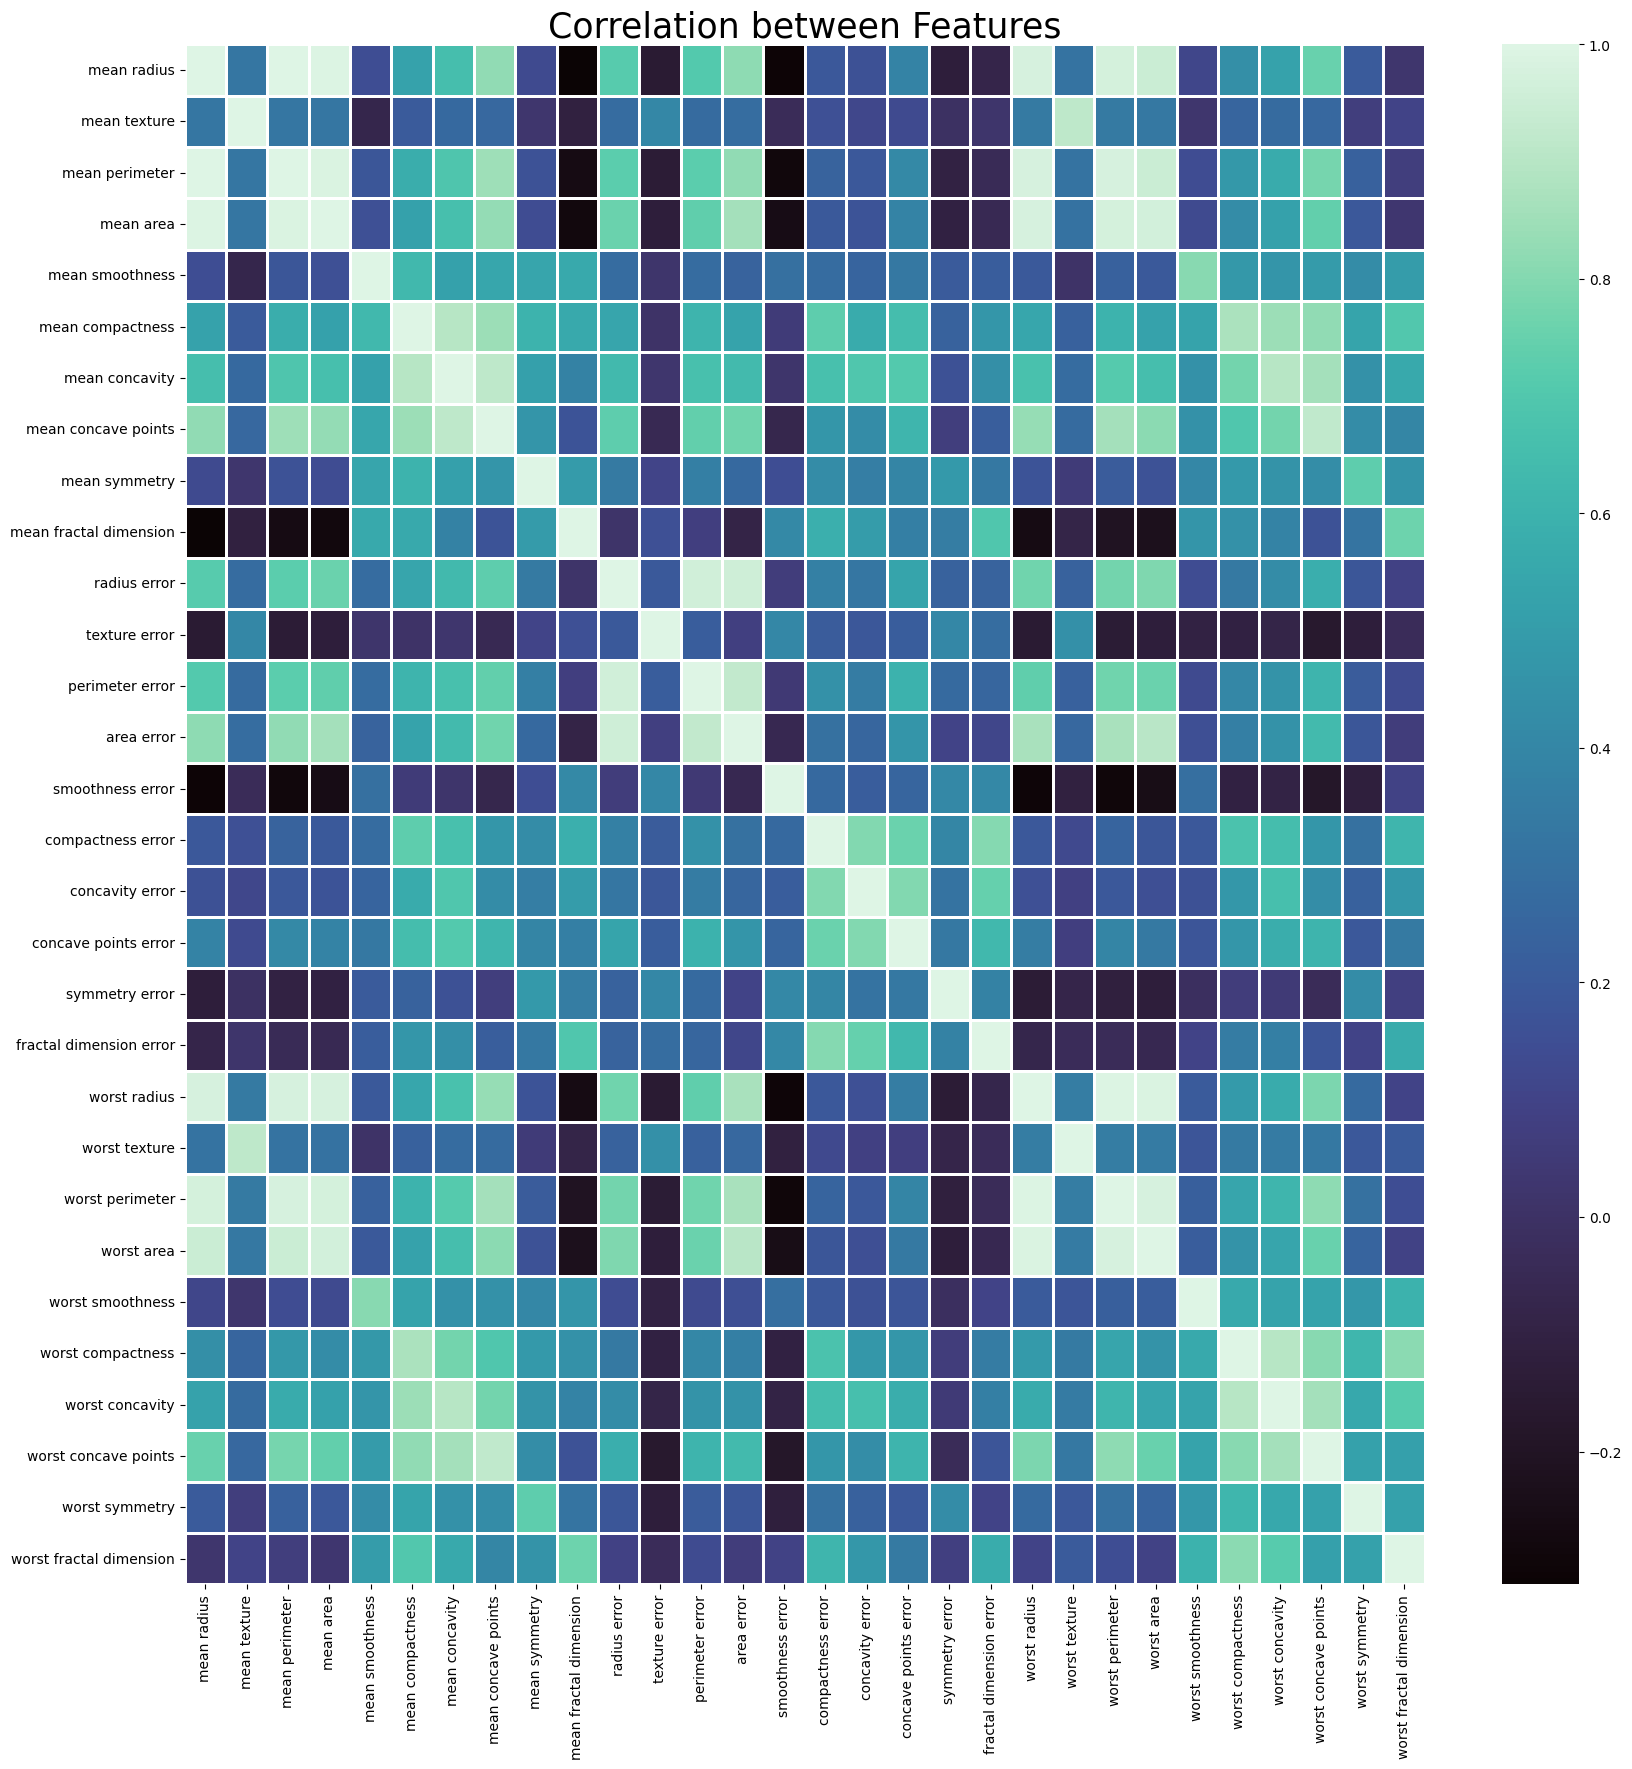

In [11]:
matrix = X_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(matrix, cmap ='mako', linewidths=2)
plt.title('Correlation between Features', size=25)
plt.show()

We see that few features are highly correlated with each other.       
These must be removed to avoid multicollinearity.

##  KDE Plots
Univariate Analysis and Bivariate Analysis

<AxesSubplot: xlabel='mean area', ylabel='Density'>

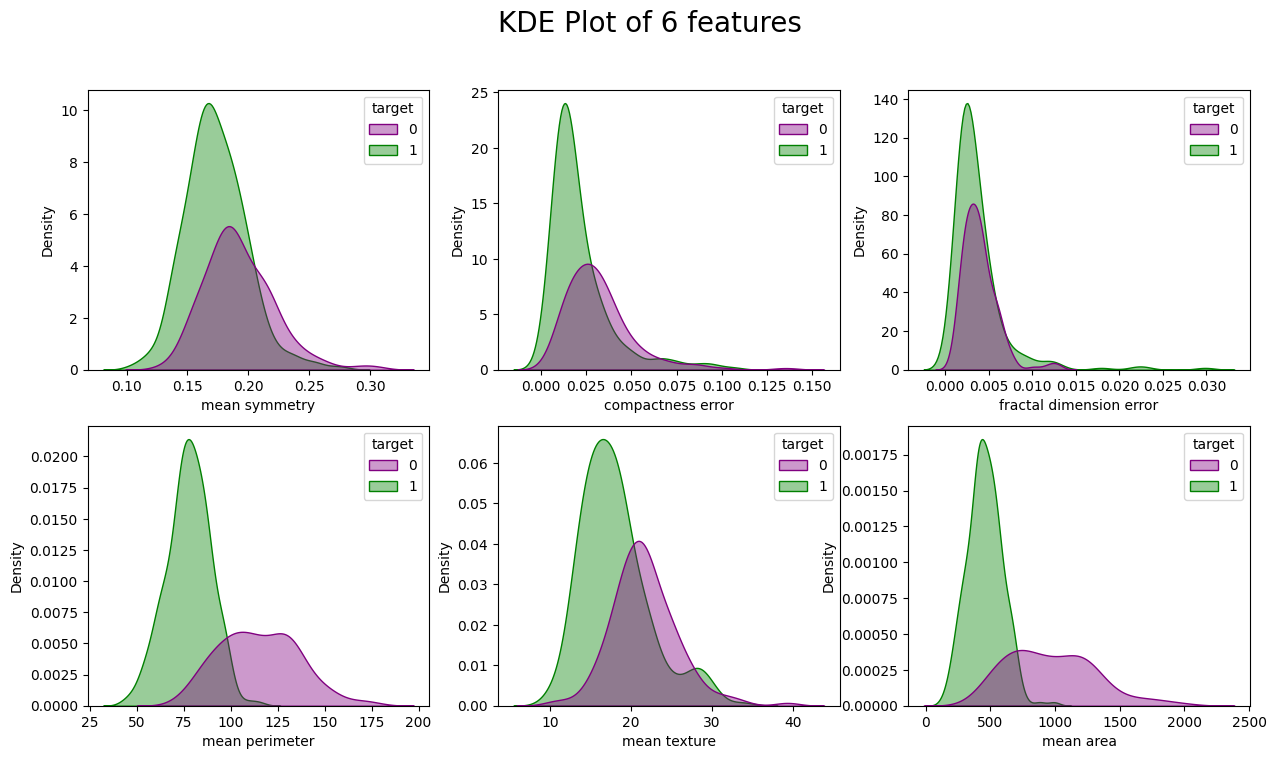

In [12]:
fig, axes = plt.subplots(2,3,figsize = (15,8)) #here, 2,3 = (row_n,col_n).
fig.suptitle("KDE Plot of 6 features", size = 20)

sns.kdeplot(x= X_train['mean symmetry'], fill = True, hue = y_train, palette = ['purple','green'], alpha = 0.4, ax = axes[0,0] )
sns.kdeplot(x= X_train['compactness error'], fill = True, hue = y_train, palette = ['purple','green'], alpha = 0.4, ax = axes[0,1] )
sns.kdeplot(x= X_train['fractal dimension error'], fill = True, hue = y_train, palette = ['purple','green'], alpha = 0.4, ax = axes[0,2] )
sns.kdeplot(x= X_train['mean perimeter'], fill = True, hue = y_train, palette = ['purple','green'], alpha = 0.4, ax = axes[1,0] )
sns.kdeplot(x= X_train['mean texture'], fill = True, hue = y_train, palette = ['purple','green'], alpha = 0.4, ax = axes[1,1] )
sns.kdeplot(x= X_train['mean area'], fill = True, hue = y_train, palette = ['purple','green'], alpha = 0.4, ax = axes[1,2] )

- We see the absolute need of reducing the number of features as most of them are overlapping.
- Which means, they are not contributing much to the classification.
- Nevertheless, some features like 'mean perimeter' contribute significantly to the classification.
- We also realize the need of scaling the features.

# Scaling

## MinMaxScaler
- MinMaxScaler carries out normalization on the dataset.
- It *lessens the effect of outliers* (while model training) and makes the data more uniform.
- Helps in generalizing the model.
- Gives less accuracy than StandardScaler.
- It is used when the distribution is *not* Gaussian.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler(feature_range=(0,1), copy = True)

# first, fit the train data (not the whole dataset)
# make sure that test data doesn't leak into train set.
scaler_minmax.fit(X_train)

# trasform the train and test data 
X_train_scaled_minmax = scaler_minmax.transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

# Per feature relative scaling of the data. Equivalent to (max - min) / (X.max(axis=0) - X.min(axis=0))
print("Scale: ",scaler_minmax.scale_)
# Per feature range (data_max_ - data_min_) seen in the data
print("\nRange: ", scaler_minmax.data_range_)

Scale:  [5.33361779e-02 3.38180588e-02 7.66812361e-03 5.35762122e-04
 1.29382844e+01 3.06729648e+00 2.34521576e+00 5.22739153e+00
 5.05050505e+00 2.18388294e+01 8.47816872e-01 2.82821427e-01
 9.69649956e-02 4.61101479e-03 3.51333310e+01 7.51043951e+00
 2.52525253e+00 1.89429816e+01 1.44069384e+01 3.45480425e+01
 3.96825397e-02 2.66524520e-02 5.59002739e-03 3.07995565e-04
 7.29128691e+00 9.76867771e-01 7.98722045e-01 3.43642612e+00
 2.37642586e+00 6.56641933e+00]

Range:  [1.87490e+01 2.95700e+01 1.30410e+02 1.86650e+03 7.72900e-02 3.26020e-01
 4.26400e-01 1.91300e-01 1.98000e-01 4.57900e-02 1.17950e+00 3.53580e+00
 1.03130e+01 2.16872e+02 2.84630e-02 1.33148e-01 3.96000e-01 5.27900e-02
 6.94110e-02 2.89452e-02 2.52000e+01 3.75200e+01 1.78890e+02 3.24680e+03
 1.37150e-01 1.02368e+00 1.25200e+00 2.91000e-01 4.20800e-01 1.52290e-01]


### Box Plots after MinMaxScaler

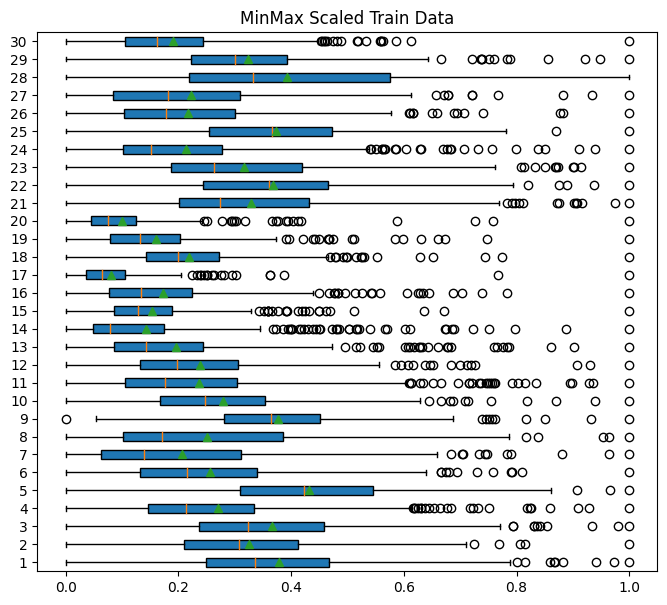

In [14]:
# plot box plot on train data to check Outliers
plt.figure(figsize = (8,7))
plt.boxplot(X_train_scaled_minmax, patch_artist=True, showmeans=True, vert = False)
plt.title("MinMax Scaled Train Data")
plt.show()

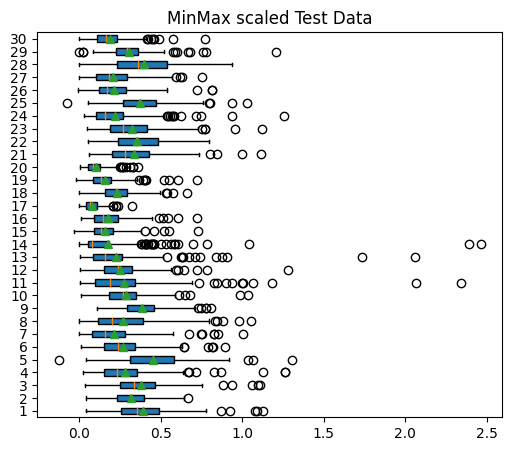

In [15]:
# plot box plot for test data
plt.figure(figsize = (6,5))
plt.boxplot(X_test_scaled_minmax, patch_artist=True, showmeans=True, vert = False)
plt.title("MinMax scaled Test Data")
plt.show()

We can observe the following changes after MinMaxScaling:
- In the Scaled Train set, all features range from 0 to 1.
- While in Scalled Test set, festures have slightly different ranges but not (0,1).
- The Outliers lie within the scaled range of the features.
- This will lessen the effect of outliers on the model.
- Interestingly, we can now clearly observe that all features are right skewed.(mean > median)
- By removing outliers, we may end up lossing most of this scaled data!

## StandardScaler
- StandardScaler carries out standardization on the dataset.
- It gives more Guassian like distribution. (mean = 0, std = 1)
- It is used when the distribution is Gaussian.
- It is more sensitive to Outliers than MinMaxScaler.
- It might give better accuracy than MinMaxScaler, but poor generalization.


In [16]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler(with_mean=True, copy = True, with_std=True)
scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test)

# Per feature relative scaling of the data to achieve zero mean and unit variance.
print("Scale: ",scaler_std.scale_)
# The mean value for each feature in the training set.
print("\nMean: ", scaler_std.mean_)

Scale:  [3.48243834e+00 4.53528346e+00 2.40032190e+01 3.38399516e+02
 1.30281055e-02 5.28656956e-02 8.08071192e-02 3.83991865e-02
 2.80403777e-02 7.16111779e-03 2.28700131e-01 5.44420506e-01
 1.70633744e+00 3.42259586e+01 3.04742219e-03 1.87497061e-02
 3.38569597e-02 6.38849451e-03 8.63883980e-03 2.92862475e-03
 4.86208967e+00 6.36498840e+00 3.38482908e+01 5.66299879e+02
 2.23132526e-02 1.63935841e-01 2.22103952e-01 6.76565715e-02
 6.33486766e-02 1.86912252e-02]

Mean:  [1.40618661e+01 1.93546719e+01 9.14828084e+01 6.47764829e+02
 9.58313123e-02 1.03008556e-01 8.79766029e-02 4.78502467e-02
 1.80459318e-01 6.27422572e-02 3.91469029e-01 1.20105669e+00
 2.77488215e+00 3.81021339e+01 7.01159318e-03 2.53448819e-02
 3.22027102e-02 1.15491864e-02 2.06978110e-02 3.81312625e-03
 1.62337822e+01 2.58396588e+01 1.07008425e+02 8.76734908e+02
 1.32334777e-01 2.56649003e-01 2.78024139e-01 1.14247588e-01
 2.92647244e-01 8.42113386e-02]


### Plots after StandardScaler

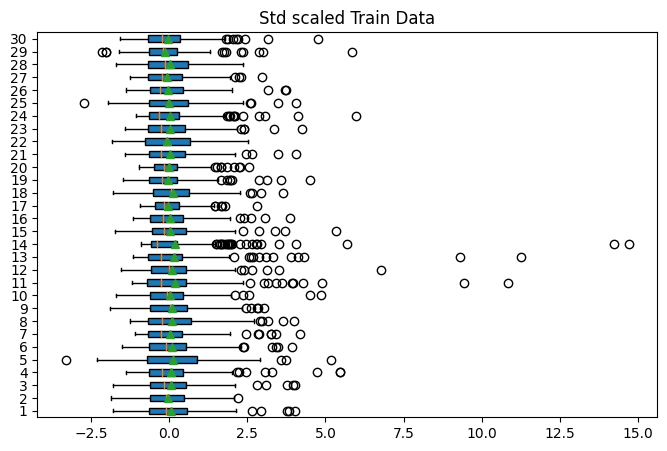

In [17]:
# plot box plot for test data
plt.figure(figsize = (8,5))
plt.boxplot(X_test_scaled_std, patch_artist=True, showmeans=True, vert = False)
plt.title("Std scaled Train Data")
plt.show()

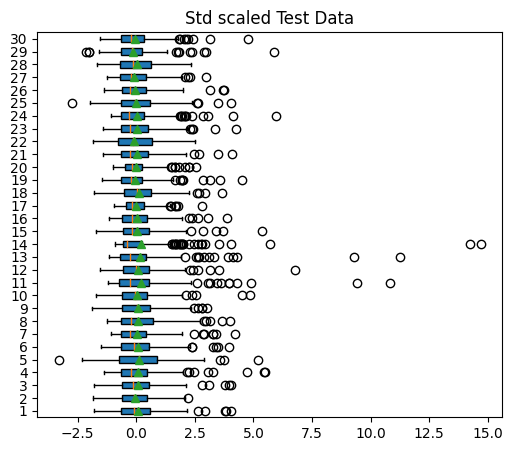

In [18]:
# plot box plot for test data
plt.figure(figsize = (6,5))
plt.boxplot(X_test_scaled_std, patch_artist=True, showmeans=True, vert = False)
plt.title("Std scaled Test Data")
plt.show()

<Figure size 640x480 with 0 Axes>

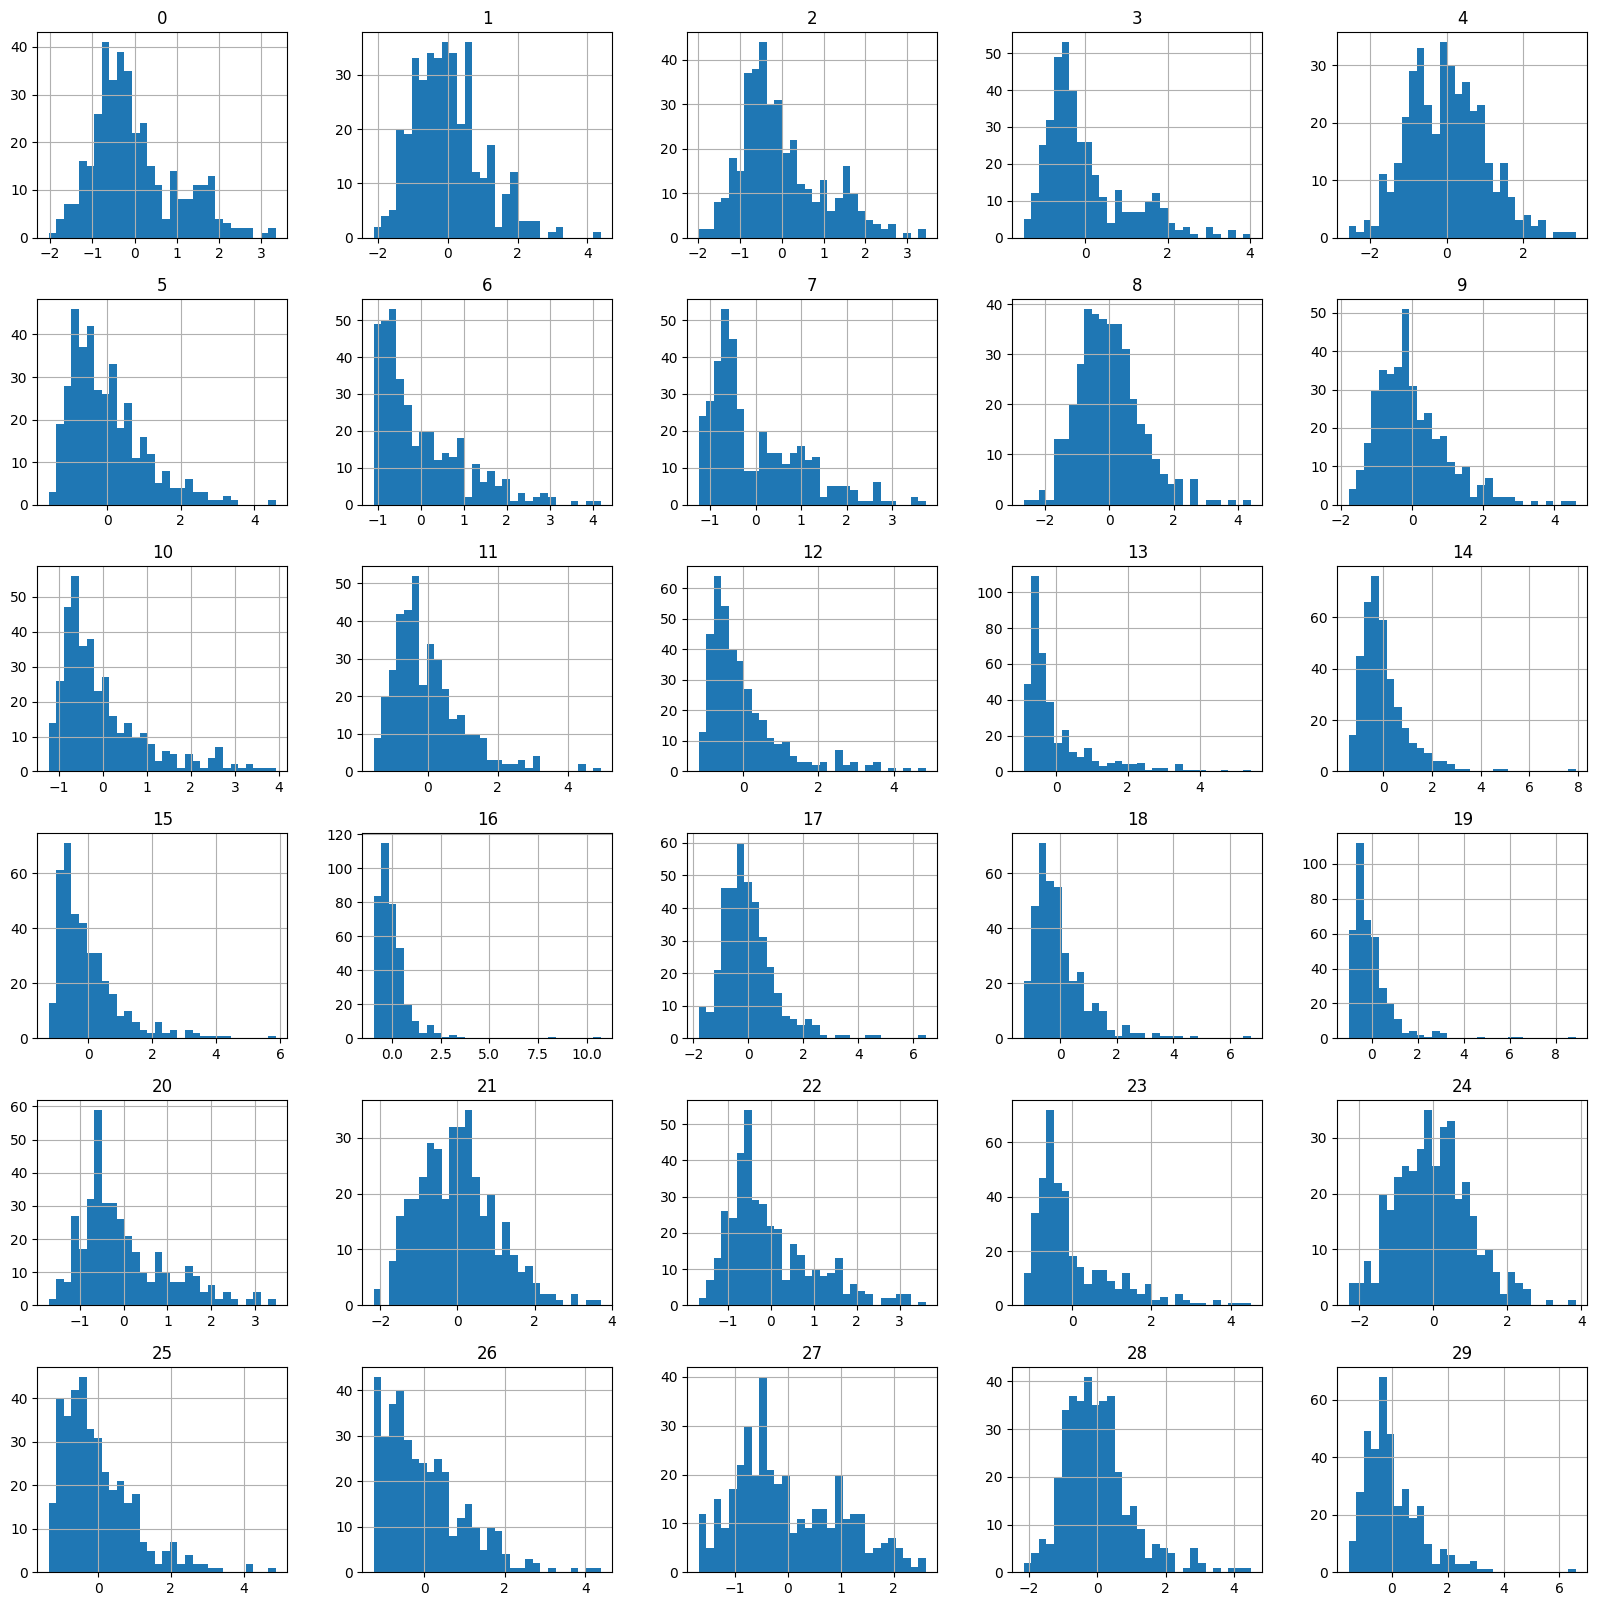

In [19]:
# Further Analysis using histograms
plt.figure()
X_train_scaled_std_df = pd.DataFrame(X_train_scaled_std)
X_train_scaled_std_df.hist(figsize= (20,20), bins = 30)
plt.show()

We can observe the following changes afrer StandardScaling:
- In the Scaled Train set, all features have mean = 0 and std = 1.
- Outliers are still present in the scaled data.
- All features are still Right Skewed.
- The scaled data is more Guassian like, though right skewed.
- The scaled data is more concentrated around the mean.

Try the following and observe the changes in the plots:
- change with_mean = False in StandardScaler() 
- change with_std = False in StandardScaler() 


We have decided to keep the Outliers for now.


# Feature Selection

In [20]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc_for_rfe = DecisionTreeClassifier()
rfe = RFE(dtc_for_rfe, n_features_to_select=4, verbose = 1, step = 4)

# fit and trasform:
rfe.fit(X_train_scaled_std_df, y_train)
res_features = rfe.transform(X_train_scaled_std_df) # Returns the input samples with only the selected features.

print("\nSupport: ",rfe.support_)
print("\nRanking: ",rfe.ranking_)
indices = list(np.where(rfe.support_ == True))[0]
print("Indices: ", indices)

selected_feature_names = feature_names[indices]
print("Features Selected: ",selected_feature_names)

scores = cross_val_score(rfe, X_train_scaled_std, y_train, cv = 5, scoring = 'accuracy', n_jobs = -1)
print("Scores from cross_validation: ", scores)

Fitting estimator with 30 features.
Fitting estimator with 26 features.
Fitting estimator with 22 features.
Fitting estimator with 18 features.
Fitting estimator with 14 features.
Fitting estimator with 10 features.
Fitting estimator with 6 features.

Support:  [False False False False False False False False False False False  True
 False False False False False False False False  True  True False False
 False False False  True False False]

Ranking:  [8 6 5 5 5 4 5 4 6 3 6 1 2 4 3 7 7 7 4 6 1 1 3 8 8 8 2 1 3 7]
Indices:  [11 20 21 27]
Features Selected:  ['texture error' 'worst radius' 'worst texture' 'worst concave points']
Scores from cross_validation:  [0.93506494 0.94736842 0.92105263 0.94736842 0.94736842]


In [21]:
cd.get_info()

-------------------------------------------------------------
                    Data Info:
-------------------------------------------------------------
No. of samples: 	 569
No. of features: 	 30
Feature Names: 		 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Targets: 		 [0 1]
Target Value Count: 	 {1: 357, 0: 212}
Total Missing values: 	 0
Outliers Detected: 	 (608, [25.22, 22.27, 24.25, 23.27, 27.22, 23.29])
Duplicates: 		 0
Whether scaled? 	 None
-------------

# Dimensionality Reduction
Using Principal Component Analysis (PCA)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, copy = True, svd_solver='auto')
# perform PCA avoiding data leakage
pca.fit(X_train_scaled_std)
pc_train = pd.DataFrame(pca.transform(X_train_scaled_std), columns=['f1','f2'])
pc_test = pd.DataFrame(pca.transform(X_test_scaled_std), columns=['f1','f2'])

# what it returns:
# Percentage of variance explained by each of the selected components.
# The amount of variance explained by each of the selected components. 
# The variance estimation uses n_samples - 1 degrees of freedom.
print("Explained Variance: ",pca.explained_variance_)
print("Ratio: ",pca.explained_variance_ratio_)

Explained Variance:  [13.52157595  5.8328283 ]
Ratio:  [0.44953621 0.1939173 ]


`pc_train` and `pc_test` are the new train and test sets after PCA.      
Let's plot graphs to visualize these.

## Plots after PCA

### Histogram

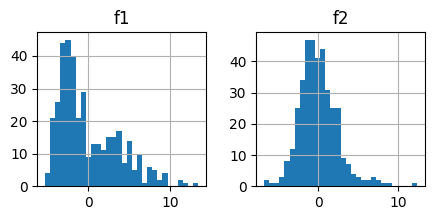

In [23]:
pc_train.hist(bins = 30, figsize=(5,2))
plt.show()

### Box Plots

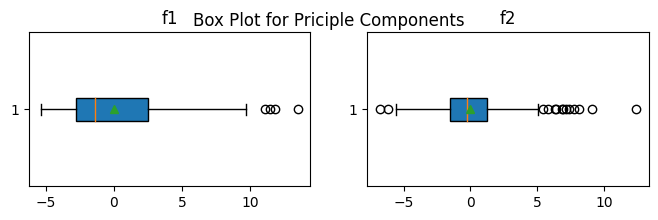

In [24]:
fig, axes = plt.subplots(1,2, figsize = (8,2))
fig.suptitle("Box Plot for Priciple Components\n\n")

axes[0].boxplot(pc_train['f1'], patch_artist = True, showmeans = True, vert = False)
axes[0].set_title("f1")
axes[1].boxplot(pc_train['f2'], patch_artist = True, showmeans = True, vert = False)
axes[1].set_title("f2")
plt.show()

In [25]:
### Get Outlier Count

In [26]:
cd1 = CleanData(pc_train, y_train)
print("Outliers count:", cd1.detect_outliers()[0])
cd1.get_info()
# if only one of X or y is given?
# return the info about only one dataset.
# remove the space after the info.
# get outlier_count for different features.

Outliers count: 18
-------------------------------------------------------------
                    Data Info:
-------------------------------------------------------------
No. of samples: 	 381
No. of features: 	 2
Feature Names: 		 ['f1', 'f2']
Targets: 		 [1 0]
Target Value Count: 	 {1: 239, 0: 142}
Total Missing values: 	 0
Outliers Detected: 	 (18, [11.036715922650549, 11.795025986623004, 11.42475549569931, 13.462052452256124, 6.864929573149406, 8.162647358996303])
Duplicates: 		 0
Whether scaled? 	 None
-------------------------------------------------------------




# Model Training and Testing

## KNN

Using Scaled Data for experimenting

In [27]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train_scaled_std, y_train)
y_hat = knn.predict(X_test_scaled_std)
print("Metrics for KNN:")
print("--------------------------------")
print("Accuracy: ", accuracy_score(y_test, y_hat).round(3))
print("Recall: ", recall_score(y_test, y_hat).round(3))
print("F1 Score: ", f1_score(y_test, y_hat).round(3))

Metrics for KNN:
--------------------------------
Accuracy:  0.963
Recall:  1.0
F1 Score:  0.971


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs = -1)
lr.fit(pc_train, y_train)
y_hat = lr.predict(pc_test)
print("Metrics for Logistic Regression:")
print("--------------------------------")
print("Accuracy: ", accuracy_score(y_test, y_hat).round(3))
print("Recall: ", recall_score(y_test, y_hat).round(3))
print("F1 Score: ", f1_score(y_test, y_hat).round(3))

Metrics for Logistic Regression:
--------------------------------
Accuracy:  0.957
Recall:  0.966
F1 Score:  0.966


## Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(pc_train, y_train)
y_hat = dtc.predict(pc_test)
print("Metrics for Decission Tree Classifier:")
print("--------------------------------")
print("Accuracy: ", accuracy_score(y_test, y_hat).round(3))
print("Recall: ", recall_score(y_test, y_hat).round(3))
print("F1 Score: ", f1_score(y_test, y_hat).round(3))

Metrics for Decission Tree Classifier:
--------------------------------
Accuracy:  0.947
Recall:  0.966
F1 Score:  0.958


# Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
scores = cross_val_score(dtc, pc_train, y_train, scoring = 'accuracy', n_jobs = -1, cv = skf)
print("Cross Validation Scores: ")
for i in range(len(scores)):
    print(i, "Fold: ", scores[i].round(4))
print("Mean scoring: ",scores.mean().round(4))
print("Standard Deviation: ",scores.std().round(4))

Cross Validation Scores: 
0 Fold:  0.8974
1 Fold:  0.8947
2 Fold:  0.7895
3 Fold:  0.8684
4 Fold:  0.9211
5 Fold:  0.9474
6 Fold:  0.9211
7 Fold:  0.9474
8 Fold:  0.9211
9 Fold:  0.9474
Mean scoring:  0.9055
Standard Deviation:  0.0458


The Accuracy scores are really good when cross validation is performed.      
We conclude the experiment at this point.

# Pipeline

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    shuffle=True, stratify=y, 
                                                    random_state=42)

p1 = Pipeline(steps=[('scale', StandardScaler(with_mean = True, with_std = True)), 
                     ('decomposition', PCA(n_components = 2)),
                     ('model', DecisionTreeClassifier())],
            verbose = True)

p1.fit(X_train, y_train)
print("Score: ", p1.score(X_test, y_test))

[Pipeline] ............. (step 1 of 3) Processing scale, total=   0.0s
[Pipeline] ..... (step 2 of 3) Processing decomposition, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.0s
Score:  0.9239766081871345


# The End